In [1]:
import pandas as pd
import numpy as np
from graph_tool.all import *
from graph_tool.draw import *

In [2]:
PATENT_RAW_NAME = 'patents_raw.tsv'

In [3]:
patents = pd.read_csv(PATENT_RAW_NAME, delimiter='\t', nrows=100000)

In [4]:
patents.head()

,patent_id,citation_id,date,name,kind
0,9009250,8127342,2012-02-01,Boynton et al.,B2
1,9643605,5471515,1995-11-01,Fossum et al.,A
2,5354551,4875247,1989-10-01,Berg,NaN
3,D786922,D718330,2014-11-01,Shin,S
4,D490798,D190749,1961-06-01,Matri et al.,S


In [5]:
graph = Graph()
prop = graph.new_vertex_property('string')
#graph.vertex_properties['name'] = prop

used = dict()
counter = -1
for edge in patents[['patent_id', 'citation_id']].iterrows():
    source = edge[1][0]
    target = edge[1][1]
    
    #print(edge)
    
    if source not in used:
        graph.add_vertex(1)
        counter += 1
        prop[graph.vertex(counter)] = source
        used[source] = counter
    if target not in used:
        graph.add_vertex(1)
        counter += 1
        prop[graph.vertex(counter)] = target
        used[target] = counter

    graph.add_edge(graph.vertex(counter-1), graph.vertex(counter), add_missing=False)

In [ ]:
pos = arf_layout(graph, max_iter=0)
graph_draw(graph, pos=pos, vertex_text=prop, vertex_font_size=10, inline=True)

In [24]:
pg = Graph()

In [52]:
pg.add_edge_list(patents[['patent_id', 'citation_id']].values, hashed=True)

<PropertyMap object with key type 'Vertex' and value type 'python::object', for Graph 0x7fe8b7df4c18, at 0x7fe8b7f39588>

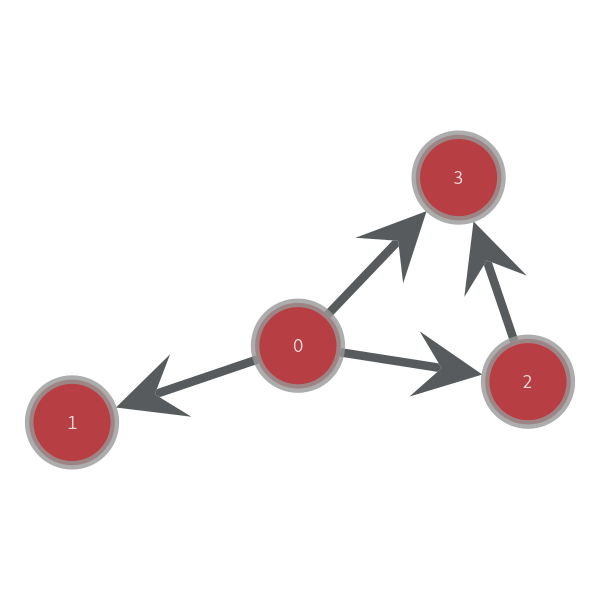

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe8b7f269e8, at 0x7fe8b7f39ba8>

In [51]:
pos = sfdp_layout(g)
graph_draw(g, pos=pos, vertex_text=g.vertex_index, vertex_font_size=18, output="two-nodes.png")